Ivan Arias

2021/02/03

In [1]:
import sys
sys.path.append('/net/nasstore/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/plot')
import doppler_plot as plot
import importlib


## You are using the Python ARM Radar Toolkit (Py-ART), an open source
## library for working with weather radar data. Py-ART is partly
## supported by the U.S. Department of Energy as part of the Atmospheric
## Radiation Measurement (ARM) Climate Research Facility, an Office of
## Science user facility.
##
## If you use this software to prepare a publication, please cite:
##
##     JJ Helmus and SM Collis, JORS 2016, doi: 10.5334/jors.119



In [236]:
importlib.reload(plot)

'/top/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/analysis/Dec14/csapr_1b.2_20181214_0200.nc'
filename_1b = '/top/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/analysis/Dec14/MultipDoppler_examples/dualDop_grid_20181214T0200.nc' 
'/top/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/analysis/Dec14/chivo_1b.2_20181214_0200_forDDA.nc'
#filename_1b = 'chivo_1b_20181214_0230.nc'
filename_dd = '/top/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/analysis/Dec14/MultipDoppler_examples/dualDop_grid_20181214T0200.nc'

'/top/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/analysis/Dec14/MultipDoppler_examples/dualDop_grid_20181214T0200.nc'

'/top/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/analysis/Dec14/DDA_20181214_0200.nc'

d = 0

x0 = -38#-90 #-90 + 15
y0 = 10#35 #-10 + 15

x1 = -38#-50 + 5  #-65 + 28
y1 = -40#0 - 3 # 20  + 28

x0 = x0 + d
x1 = x1 + d

ind = 6

/net/nasstore/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/plot/doppler_plot.py:314: UserWarning: Warning: converting a masked element to nan.
  Ui_pj[i, j] = ((x1-x0)*u + (y1-y0)*v)/distance # Projection of a vector on another vector
/net/nasstore/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/plot/doppler_plot.py:315: UserWarning: Warning: converting a masked element to nan.
  Wi[i, j] = fn_w(np.array([xi[i], yi[i], z[j]]))
/net/nasstore/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/plot/doppler_plot.py:316: UserWarning: Warning: converting a masked element to nan.
  Zi[i, j] = fn_z(np.array([xi[i], yi[i], z[j]]))
/net/nasstore/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/plot/doppler_plot.py:318: RuntimeWarning: invalid value encountered in less
  Ui_pj = np.ma.masked_where( Ui_pj < -100, Ui_pj)
/net/nasstore/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/plot/doppler_plot.py:334: UserWarning: Warning: converting a masked element to nan.
  field_var_i[i, j] = fn_field_var(np.array([

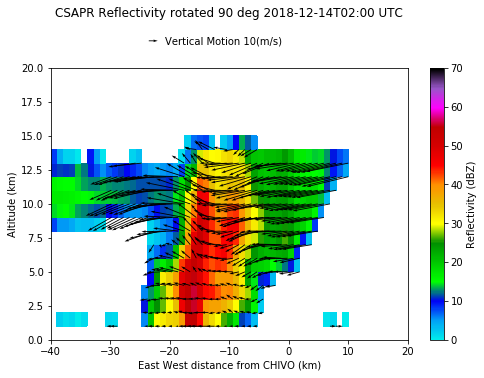

In [259]:
importlib.reload(plot)

fig = plot.cross_sec_NorthSouth(filename_1b, filename_dd,
                                'reflectivity',  x0=x0, y0=y0, x1=x1, y1=y1)


<function matplotlib.pyplot.show(*args, **kw)>

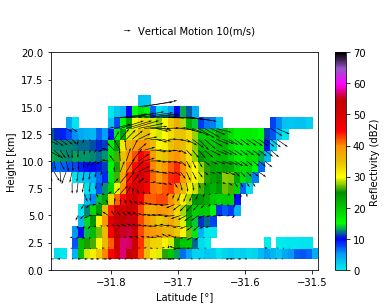

In [264]:
import numpy as np

pyart_grid = pyart.io.read_grid(filename_dd)

ind = 100 + - 37
#ind = 100 +16
thin = 1

U = pyart_grid.fields['eastward_wind']['data']
#V = pyart_grid.fields['northward_wind']['data']
W = pyart_grid.fields['upward_air_velocity']['data']
Z = pyart_grid.fields['reflectivity']['data']
y, z = np.meshgrid(0.001*pyart_grid.y['data'], 0.001*pyart_grid.z['data'])

#V = np.swapaxes(V,1,2)
W= np.swapaxes(W,1,2)
Z = np.swapaxes(Z,1,2)

#V = np.swapaxes(V,0,1)
W= np.swapaxes(W,0,1)
Z = np.swapaxes(Z,0,1)

# substract U anomalies from each layer


V_anomalies = pyart_grid.fields['northward_wind']['data']

for i in range(len(V_anomalies)):
    Vm = np.ma.mean(V_anomalies[i])
    V_anomalies[i] = V_anomalies[i] - Vm

V_anomalies = np.swapaxes(V_anomalies,1,2)
V_anomalies = np.swapaxes(V_anomalies,0,1)

Z = np.ma.masked_where( Z < 0 , Z)

chivo_lons, chivo_lats = pyart_grid.get_point_longitude_latitude()
lats_vector = np.mean(chivo_lats, axis=1)
lats_mat, z = np.meshgrid(lats_vector, 0.001*pyart_grid.z['data'])

#fig = plt.figure(figsize=(7, 3))
cs = plt.pcolormesh(lats_vector, z,
                    Z[ind], vmin=0, vmax=70, cmap='pyart_NWSRef')

ilev = ind



#U[ilev] = np.ma.masked_where( z > 14 , U[ilev])
#U[ilev] = np.ma.masked_where( x > -20 , U[ilev])

q = plt.quiver(lats_mat[::thin, ::thin], z[::thin, ::thin],
            V_anomalies[ilev][::thin, ::thin], W[ilev][::thin, ::thin],
            scale = 400, color='black',)

plt.quiverkey(q, X=0.3, Y=1.1, U=10,
             label='Vertical Motion 10(m/s)', labelpos='E')

plt.xlim(-31.89, -31.49)
plt.ylim(0, 20)

# plt.xlim(-54, -36)
# plt.ylim(-18, 0)

plt.colorbar(cs, label='Reflectivity (dBZ)')
#plt.title('Max Reflectivity (filled) and Updrafts (black, 10 m/s)\n \n' )
plt.title('\n \n')
plt.xlabel('Latitude [°]')
plt.ylabel('Height [km]')

plt.show

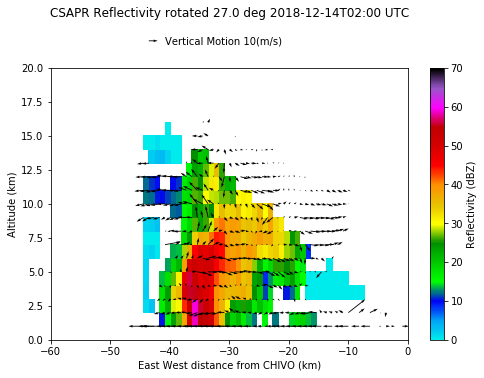

In [185]:
importlib.reload(plot)

fig = plot.cross_sec(filename_1b, filename_dd, 'reflectivity',  x0=x0, y0=y0, x1=x1, y1=y1)
#fig = plot.cross_sec(filename_1b, filename_dd, 'diff ref',  x0=x0, y0=y0, x1=x1, y1=y1)
#fig = plot.cross_sec(filename_1b, filename_dd, 'specific diff phase',  x0=x0, y0=y0, x1=x1, y1=y1)
#fig = plot.cross_sec(filename_1b, filename_dd, 'copol correlation',  x0=x0, y0=y0, x1=x1, y1=y1)
#fig = plot.cross_sec(filename_1b, filename_dd, 'hydroclass',  x0=x0, y0=y0, x1=x1, y1=y1)



/net/nasstore/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/plot/doppler_plot.py:65: UserWarning: The following kwargs were not used by contour: 'antialised'
  plt.contour(x, y, W, levels=[1, 5, 10], colors=['k', 'k', 'k'], antialised = True)


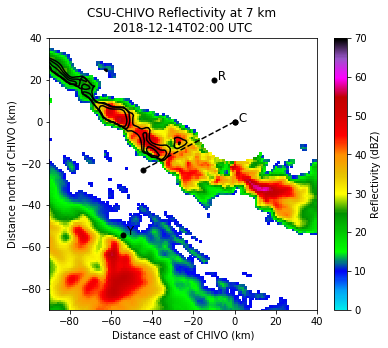

In [180]:
importlib.reload(plot)

fig = plot.cappi(filename_1b, filename_dd, 'reflectivity',  ind, x0=x0, y0=y0, x1=x1, y1=y1)
#fig = plot.cappi(filename_1b, filename_dd, 'diff reflectivity',  ind, x0=x0, y0=y0, x1=x1, y1=y1)
#fig = plot.cappi(filename_1b, filename_dd, 'specific diff phase',  ind, x0=x0, y0=y0, x1=x1, y1=y1)
#fig = plot.cappi(filename_1b, filename_dd, 'correlation ratio',  ind, x0=x0, y0=y0, x1=x1, y1=y1)


In [13]:
# Create grid

import pyart
import time
import matplotlib.pyplot as plt

def grid_radar(radar, grid_shape=(20, 301, 301), xlim=(-150000, 150000),
               ylim=(-150000, 150000), zlim=(1000, 20000),
               fields=['DT', 'VT'], origin=None):
    bt = time.time()
    radar_list = [radar]
    if origin is None:
        origin = (radar.latitude['data'][0],
                  radar.longitude['data'][0])
    grid = pyart.map.grid_from_radars(
        radar_list, grid_shape=grid_shape,
        grid_limits=(zlim, ylim, xlim),
        grid_origin=origin, fields=fields,
        gridding_algo='map_gates_to_grid', grid_origin_alt=0.0)
    print(time.time()-bt, 'seconds to grid radar')
    return grid


filename_chivo = '/net/k2/storage/projects/RELAMPAGO/quality_controlled_data/level_1b.2/2018/12/14/chivo.1b.2.20181214_020047.REL_PFAR360.nc'
'/net/k2/storage/projects/RELAMPAGO/quality_controlled_data/test/att_correction_test_1b/chivo.1a.20181214_023049.REL_PNL360A_whitney.nc'
'/net/k2/storage/projects/RELAMPAGO/quality_controlled_data/test/data_1b/chivo.1b.20181214_023049.REL_PNL360A.nc'
'/net/k2/storage/projects/RELAMPAGO/quality_controlled_data/level_1b.2/2018/12/14/chivo.1b.20181214_023049.REL_PNL360A.nc'
filename_csapr = '/net/denali/storage2/radar2/people/idariash/home/Field_Campaigns/Relampago/Analisis/Dec_14/CSAPR/level_1b/corcsapr2cfrppiqcM1.1b.20181214.020004.nc'
'/net/denali/storage2/radar2/people/idariash/home/Field_Campaigns/Relampago/Analisis/Dec_14/CSAPR/level_1b/corcsapr2cfrppiqcM1.1b.20181214.023003.nc'
'/net/denali/storage2/radar2/people/idariash/home/Field_Campaigns/Relampago/Analisis/Dec_14/CSAPR/level_1b/corcsapr2cfrppiqcM1.b1.20181215.023003.nc'
'/net/denali/storage2/radar2/people/idariash/home/Field_Campaigns/Relampago/Analisis/Dec_14/CSAPR/level_1b/corcsapr2cfrppiqcM1.1b.20181215.023003.nc'
'/net/k2/storage/projects/CSAPR/DROPS/corcsapr2cfrppiqcM1.b1.20181214.023003.nc'

chivo = pyart.io.read(filename_chivo)
#csapr = pyart.io.read(filename_csapr)

g = grid_radar(chivo, origin=(chivo.latitude['data'][0], chivo.longitude['data'][0]),
                xlim=(-100000, 50000), ylim=(-100000, 50000), grid_shape=(20, 151, 151),
                fields = ['HydroClass', 'corrected_copol_correlation_ratio', 
                          'corrected_differential_phase', 'corrected_differential_reflectivity',
                          'corrected_reflectivity', 'corrected_specific_differential_phase'])

pyart.io.write_grid('chivo_1b.2_20181214_0200_forDDA.nc', g)


/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pyart/map/gates_to_grid.py:162: DeprecationWarning: Barnes weighting function is deprecated. Please use Barnes 2 to be consistent with Pauley and Wu 1990.
  " Pauley and Wu 1990.", DeprecationWarning)


5.472890853881836 seconds to grid radar


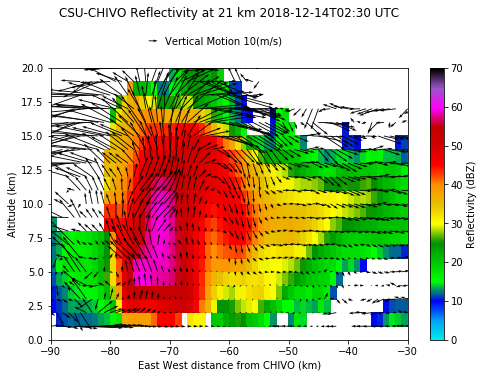

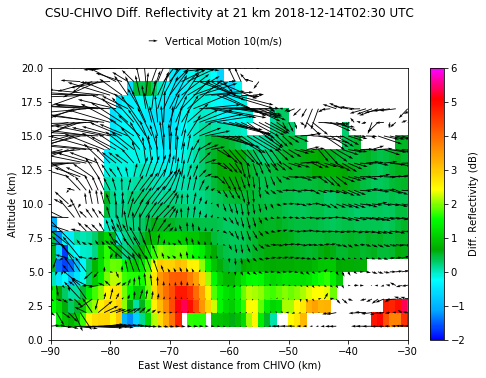

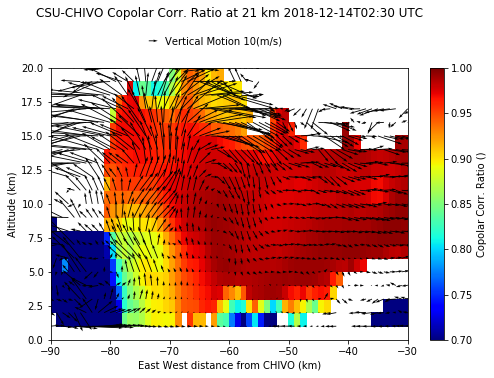

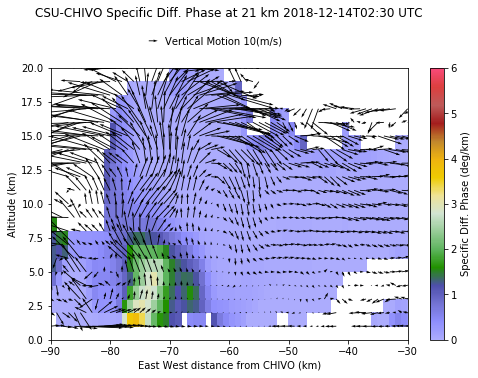

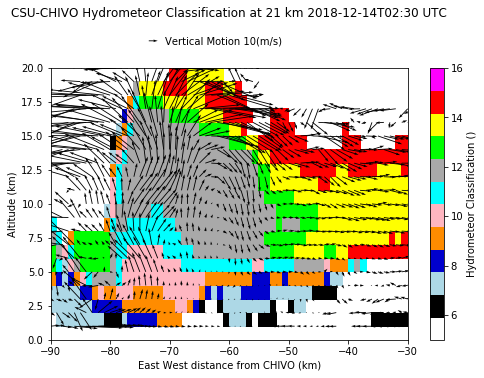

In [67]:
importlib.reload(plot)

filename_1b = 'chivo_1b_20181214_0230.nc'
filename_dd = 'dda_3radars_20181214_0230.nc'

distance_north = 21

fig = plot.cross_sec_east(filename_1b, filename_dd, 'reflectivity',  distance_north)

fig = plot.cross_sec_east(filename_1b, filename_dd, 'diff reflectivity',  distance_north)

fig = plot.cross_sec_east(filename_1b, filename_dd, 'copol correlation ratio',  distance_north)

fig = plot.cross_sec_east(filename_1b, filename_dd, 'specific diff phase',  distance_north)

fig = plot.cross_sec_east(filename_1b, filename_dd, 'hydroclass',  distance_north)


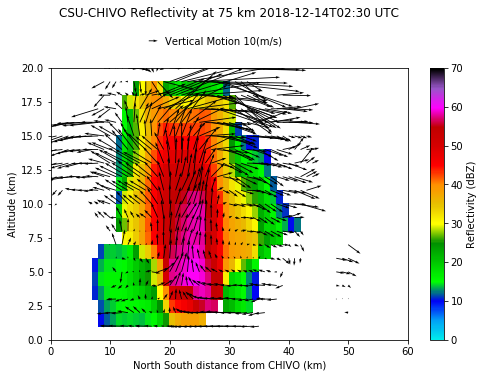

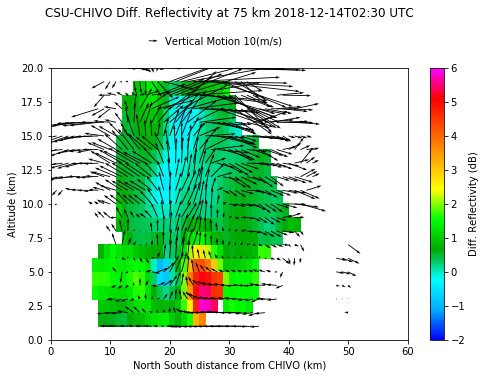

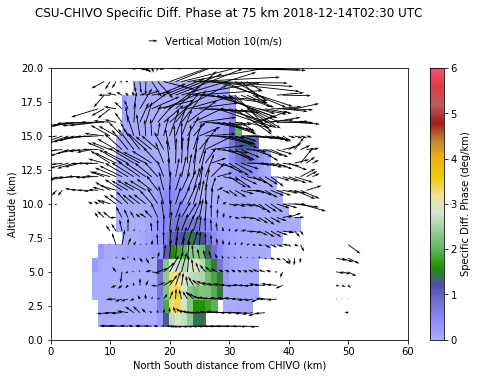

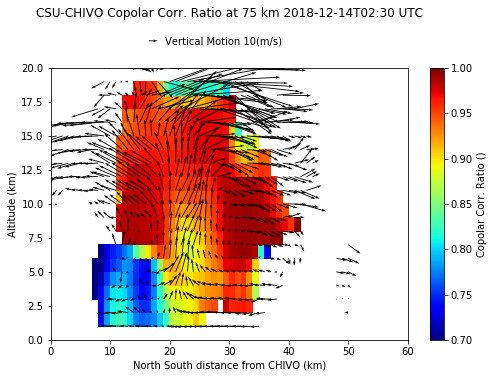

In [37]:
importlib.reload(plot)

filename_1b = 'chivo_1b_20181214_0230.nc'
filename_dd = 'dda_3radars_20181214_0230.nc'

distance_east = 75

fig = plot.cross_sec_north(filename_1b, filename_dd, 'reflectivity',  distance_east)

fig = plot.cross_sec(filename_1b, filename_dd, 'diff reflec',  distance_east)

fig = plot.cross_sec(filename_1b, filename_dd, 'specific',  distance_east)

fig = plot.cross_sec(filename_1b, filename_dd, 'correlation',  distance_east)

/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pyart/io/cfradial.py:365: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pyart/io/cfradial.py:365: UserWarning: WARNING: valid_max not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/net/nasstore/students/GRAD/ECE/idariash/home/CSU/RELAMPAGO/plot/doppler_plot.py:136: UserWarning: The following kwargs were not used by contour: 'antialised'
  plt.contour(x, y, W, levels=[1, 10,20], colors=['k', 'k', 'k'], antialised = True)
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pyart/io/cfradial.py:365: UserWarning: WARNING: valid_min not used since it
cannot be safely cast to variable data type
  data = self.ncvar[:]
/top/students/GRAD/ECE/idariash/home/anaconda3/lib/python3.7/site-packages/pyart/io/cfradial.py:365: U

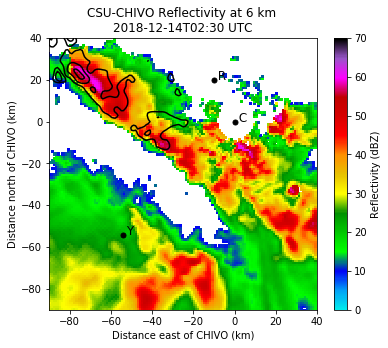

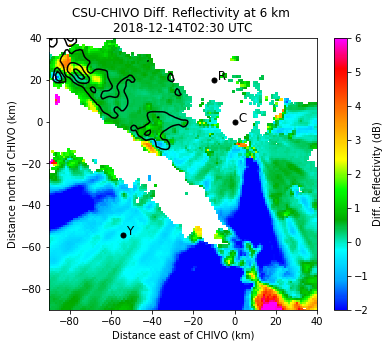

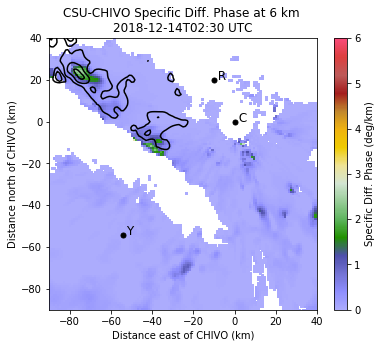

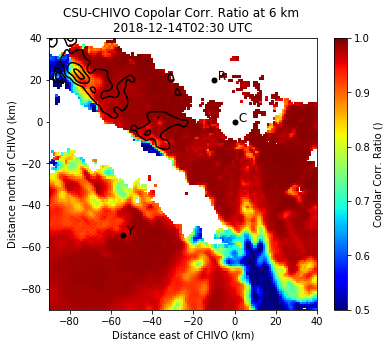

In [14]:
importlib.reload(plot)

filename_1b = 'chivo_1b_20181214_0230.nc'
filename_dd = 'dda_3radars_20181214_0230.nc'

ind = 5

fig = plot.cappi_ref(filename_1b, filename_dd, 'reflectivity',  ind)

fig = plot.cappi_ref(filename_1b, filename_dd, 'diff reflectivity',  ind)

fig = plot.cappi_ref(filename_1b, filename_dd, 'specific diff phase',  ind)

fig = plot.cappi_ref(filename_1b, filename_dd, 'correlation ratio',  ind)

In [4]:
fname = 'chivo_1b_20181214_0230.nc'
#%% Finally, let's check the results!
pyart_grid = pyart.io.read_grid(fname)
print(pyart_grid.fields.keys())

dict_keys(['HydroClass', 'corrected_copol_correlation_ratio', 'corrected_differential_phase', 'corrected_differential_reflectivity', 'corrected_reflectivity', 'corrected_specific_differential_phase', 'ROI'])
